In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install bs4
!pip install requests

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

In [5]:
def scrape_data(num=0):
  """Scrapes job data from a specified page of JobsNepal and returns a pandas DataFrame.

  Args:
      num (int, optional): The page number to scrape (defaults to 0).

  Returns:
      pd.DataFrame: A pandas DataFrame containing the extracted job data.
  """

  url = f'https://www.jobsnepal.com/jobs?page={num}'
  response = requests.get(url).text
  soup = BeautifulSoup(response, "html.parser")

  card_bodies = soup.find_all("div", class_=["card-body"])

  all_data = []

  for i in range(len(card_bodies)):
    job_data = {}
    job_title_element = card_bodies[i].find("h2", class_=["job-title"])['title']
    job_title = job_title_element if job_title_element else "Not found"
    job_data["Job Title"] = job_title

    company_name_element = card_bodies[i].find('p',class_=['mb-0']) 
    company_name = company_name_element.text.strip() if company_name_element else "Not found"
    job_data["Company Name"] = company_name

    location_element = card_bodies[i].find('div',class_=["d-flex align-items-center pl-1 pr-1 py-1"])
    location = ""
    if location_element:
      location = location_element.text.strip().replace("\n", "")
    else:
      location = "No found"
    job_data["Location"] = location

    link = ([card_bodies[i].find('a',class_=["btn btn-sm btn-primary"])['href']])
    job_data["Link"] = link

    all_data.append(job_data)

  df = pd.DataFrame(all_data)

  return df



In [6]:
all_dfs = []
num_pages = 17
for page_num in range(num_pages):
    page_df = scrape_data(page_num)
    all_dfs.append(page_df)
    
combined_df = pd.concat(all_dfs, ignore_index=True)

In [7]:
combined_df

,Job Title,Company Name,Location,Link
0,कथाका कीताबहरु छपाईका लागी दर भाउ पत्र आह्वान ...,Community Development Centre (CDC),Doti,[https://www.jobsnepal.com/kathaka-katabhara-c...
1,Short Term: To strengthen marketing skills of ...,Deloitte,"Gandaki Province, Bagmati Province, Lumbini Pr...",[https://www.jobsnepal.com/short-term-to-stren...
2,Short-Term Technical Assistance (STTA): To pro...,Deloitte,Lumbini Province,[https://www.jobsnepal.com/short-term-technica...
3,Vacancy Announcement for Various Positions,NNSWA,"Surkhet, Kailali, Kanchanpur, Jajarkot",[https://www.jobsnepal.com/vacancy-announcemen...
4,Expression of Interest for Consultancy Service...,dZi Foundation,Lalitpur,[https://www.jobsnepal.com/expression-of-inter...
...,...,...,...,...
199,QA Automation Engineer,Verisk Nepal Pvt. Ltd.,Kathmandu,[https://www.jobsnepal.com/qa-automation-engin...
200,Software Engineer- Frontend (Angular),Verisk Nepal Pvt. Ltd.,Kathmandu,[https://www.jobsnepal.com/software-engineer-f...
201,Engineering Manager (Technical Manager - Full ...,Verisk Nepal Pvt. Ltd.,Kathmandu,[https://www.jobsnepal.com/engineering-manager...
202,﻿Software Engineer (NoSQL DBA),Verisk Nepal Pvt. Ltd.,Kathmandu,[https://www.jobsnepal.com/software-engineer-n...


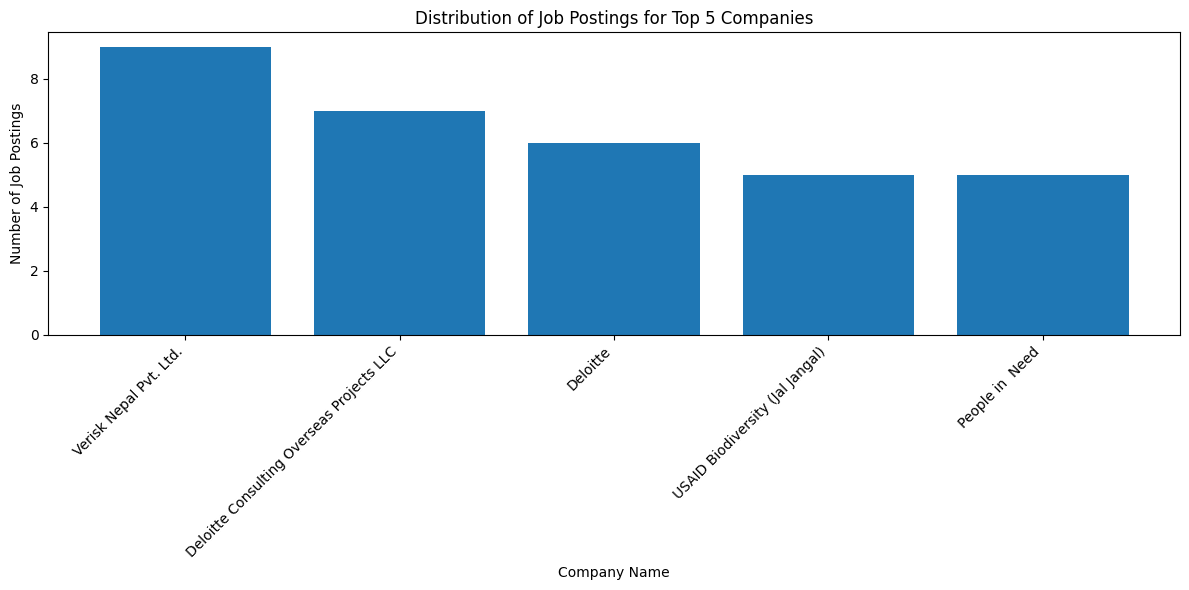

In [12]:
import matplotlib.pyplot as plt

repeated_data_counts = combined_df['Company Name'].value_counts()


top_5_companies = repeated_data_counts.head(5)


plt.figure(figsize=(12, 6)) 
plt.bar(top_5_companies.index, top_5_companies.values)  


plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings for Top 5 Companies')


if len(top_5_companies) > 4:  
    plt.xticks(rotation=45, ha='right')  

plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()



Insights on Location Distribution:

Dominant Location: Kathmandu has the most job postings (86), suggesting it's the primary location for recruitment activities in this data set.

Secondary Locations: Lalitpur (29) appears as the second-most preferred location, followed by Rautahat (4), Jajarkot (4), and potentially others 